In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 

In [86]:
file_path = 'Adidas US Sales Datasets.xlsx'
file_name = pd.read_excel(file_path)
df = pd.DataFrame(file_name)
print(df.head(5))

   Unnamed: 0   Unnamed: 1             Unnamed: 2           Unnamed: 3  \
0         NaN          NaN  Adidas Sales Database                  NaN   
1         NaN          NaN                    NaN                  NaN   
2         NaN          NaN                    NaN                  NaN   
3         NaN     Retailer            Retailer ID         Invoice Date   
4         NaN  Foot Locker                1185732  2020-01-01 00:00:00   

  Unnamed: 4 Unnamed: 5 Unnamed: 6             Unnamed: 7      Unnamed: 8  \
0        NaN        NaN        NaN                    NaN             NaN   
1        NaN        NaN        NaN                    NaN             NaN   
2        NaN        NaN        NaN                    NaN             NaN   
3     Region      State       City                Product  Price per Unit   
4  Northeast   New York   New York  Men's Street Footwear              50   

   Unnamed: 9  Unnamed: 10       Unnamed: 11       Unnamed: 12   Unnamed: 13  
0         NaN

In [106]:
print(df.info())
print(22*'--')
print(df.shape)
print(22*'--')
print(df.duplicated().value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   object        
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   object        
 10  Operating Profit  9648 non-null   object        
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
 13  year              9648 non-null   int32         
 14  month             9648 n

In [87]:
df.columns = df.iloc[3]
df  = df.iloc[4: , 1:].reset_index(drop= True)

df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [90]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['year'] = df['Invoice Date'].dt.year
df['month'] = df['Invoice Date'].dt.month
df['day'] = df['Invoice Date'].dt.day

In [97]:
# print(df.info())
print(22*'--')
print(df.describe(include= 'all'))

--------------------------------------------
3          Retailer  Retailer ID                   Invoice Date Region  \
count          9648       9648.0                           9648   9648   
unique            6          4.0                            NaN      5   
top     Foot Locker    1185732.0                            NaN   West   
freq           2637       5265.0                            NaN   2448   
mean            NaN          NaN  2021-05-10 15:20:44.776119296    NaN   
min             NaN          NaN            2020-01-01 00:00:00    NaN   
25%             NaN          NaN            2021-02-17 00:00:00    NaN   
50%             NaN          NaN            2021-06-04 00:00:00    NaN   
75%             NaN          NaN            2021-09-16 00:00:00    NaN   
max             NaN          NaN            2021-12-31 00:00:00    NaN   
std             NaN          NaN                            NaN    NaN   

3            State      City                Product  Price per Uni

In [107]:
df.duplicated().value_counts()

False    9648
Name: count, dtype: int64

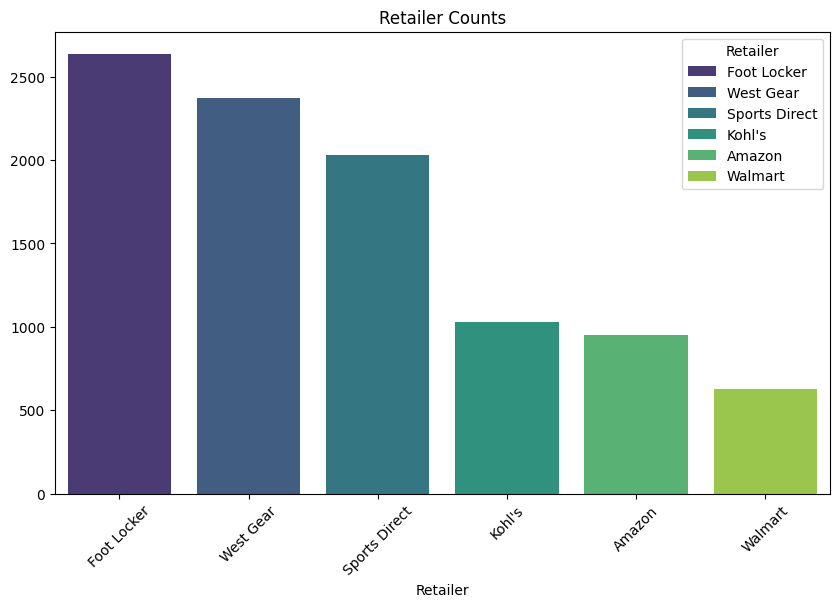

In [128]:
retailer_counts = df.Retailer.value_counts().sort_values(ascending= False)

plt.figure(figsize=(10 , 6))
sns.barplot(x = retailer_counts.index , y = retailer_counts.values , palette='viridis' , hue=retailer_counts.index , dodge=False , legend=True  )
plt.title('Retailer Counts')
plt.xticks(rotation = 45)
plt.show()

#### Retailer Market Share

C:\Users\v.lotfi\AppData\Local\Temp\ipykernel_7436\902000479.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  market_share.plot(kind = 'pie' , color = palette_color , autopct = '%1.1f%%'  , startangle=140 )


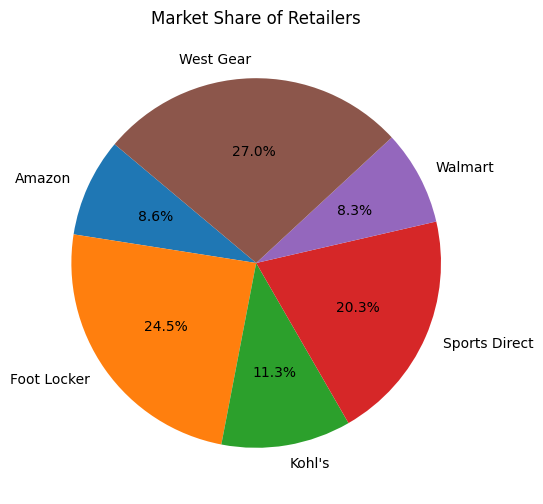

In [191]:
Retailer_sales = df.groupby(by = 'Retailer')['Total Sales'].agg('sum')
Totale_sales = Retailer_sales.sum()
market_share = Retailer_sales / Totale_sales

explode = [0, 0.1, 0, 0, 0] 
palette_color = sns.color_palette('colorblind6')
plt.figure(figsize=(10 , 6))
market_share.plot(kind = 'pie' , color = palette_color , autopct = '%1.1f%%'  , startangle=140 )
plt.title('Market Share of Retailers')
plt.ylabel('')
plt.show()